**Sabiha Mohamad - 8896658**


**Lab -9**

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with 


In [140]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [111]:
# Load the fMNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [112]:
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])
print("Image dimensions:", x_train.shape[1:])


Number of training samples: 60000
Number of test samples: 10000
Image dimensions: (28, 28)


In [113]:
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(x_train[0,0,0])}')
print(f'Label Element DType: {type(x_train[0])}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.ndarray'>


In [114]:
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')

Image Data Range:
Min: 0
Max: 255


In [115]:
# Assuming the labels are integers
unique_labels = set(y_train)
num_classes = len(unique_labels)
print("Number of classes:", num_classes)
print("Unique labels:", unique_labels)


Number of classes: 10
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


- The training set contains 60,000 images of size 28x28 pixels, and the test set contains 10,000 images of the same size.

- We determine the number of unique classes (fashion items) in the dataset. In this case, there are 10 classes, each corresponding to one of the fashion items.



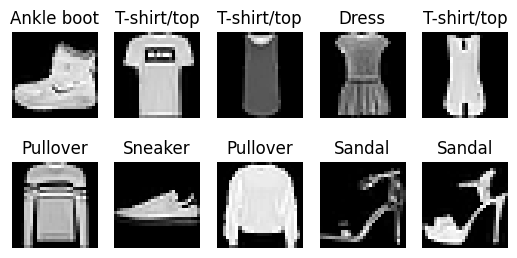

In [116]:
import matplotlib.pyplot as plt

# Define class names for visualization purposes (assuming the labels are integers from 0 to 9)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot some samples with their labels
plt.figure
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


plot samples using tesrt data

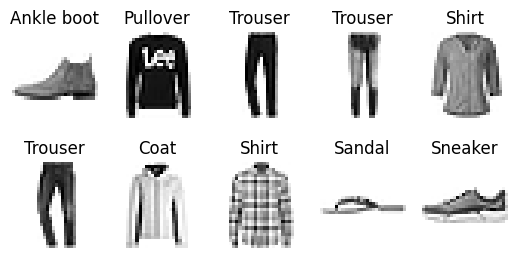

In [117]:
# Plot some samples with their labels
plt.figure
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i], cmap='binary') 
    plt.title(class_names[y_test[i]])
    plt.axis('off')
plt.show()

In [118]:
print(class_names[4])
print(class_names[6])

Coat
Shirt


2. Train a dense neural network using Keras 

In [119]:
# Reshape the data to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [120]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [121]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the class labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [141]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create and compile the dense neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [142]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [124]:
# Train the model on the training data
batch_size = 32
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5044 - accuracy: 0.8193 - val_loss: 0.3981 - val_accuracy: 0.8550
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3722 - accuracy: 0.8649 - val_loss: 0.3751 - val_accuracy: 0.8628
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8760 - val_loss: 0.3608 - val_accuracy: 0.8680
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8824 - val_loss: 0.3407 - val_accuracy: 0.8763
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8905 - val_loss: 0.3220 - val_accuracy: 0.8852
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8948 - val_loss: 0.3218 - val_accuracy: 0.8805
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.8993 - val_loss: 0.3170 - val_accuracy:

In [125]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8780
Test Loss: 0.3490545451641083
Test Accuracy: 0.878000020980835


In [126]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration

In [127]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix


confusion = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[823   3  23  43   2   0  95   0  11   0]
 [  0 973   0  22   2   0   2   0   1   0]
 [ 12   3 789  18 126   0  50   0   2   0]
 [ 11   8   6 928  16   1  26   0   4   0]
 [  0   1  89  52 820   0  33   0   5   0]
 [  0   0   0   1   0 960   0  11   2  26]
 [112   2 101  46 110   0 613   0  16   0]
 [  0   0   0   0   0  42   0 934   0  24]
 [  7   0   2   2   5   1   0   5 978   0]
 [  0   0   0   0   0   5   1  32   0 962]]


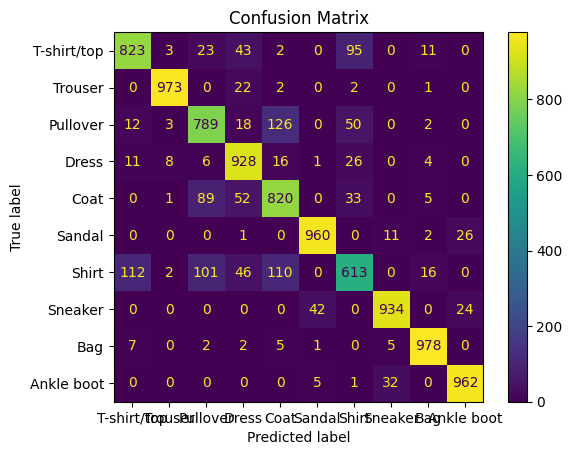

In [139]:
# Create a heatmap of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
cmd_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
cmd_display.plot(cmap='viridis', values_format='d')

plt.title("Confusion Matrix")
plt.show()

From the confusion matrix, we can make the following observations:

Diagonal Elements (True Positives): The diagonal elements represent the number of correct predictions for each class. For instance, the number of correctly classified "T-shirt/tops" is 823, and the number of correctly classified "Trouser" is 973.

Off-Diagonal Elements (Misclassifications): The off-diagonal elements represent misclassifications. For example, the model misclassified 12 samples of "T-shirt/tops" as "Pullover" and 23 samples of "Pullover" as "Dress."

High Values on the Diagonal: Classes with high values along the diagonal indicate that the model performs well in classifying those classes.

Misclassification Patterns: Certain pairs of classes might have more misclassifications, indicating potential confusion between similar-looking items. For example, "T-shirt/top" and "Shirt," or "Sandal" and "Sneaker."

Low Misclassification: Some classes may have low misclassification rates, indicating better separability and distinctiveness in the data.

In [148]:
# Class names for visualization
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Explore specific examples of incorrect classifications
incorrect_indices = np.where(y_pred_classes != y_true)[0]
num_examples = 3


Examples of Incorrect Classifications:
Predicted: Sandal, True: Sneaker, Confidence: 97.31%


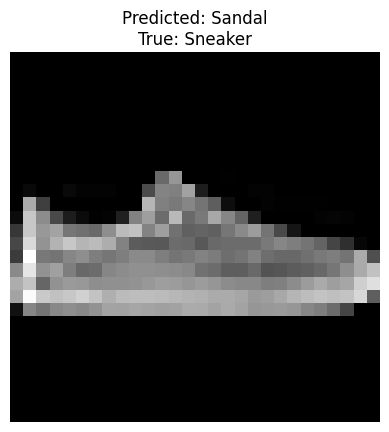

Predicted: Pullover, True: Coat, Confidence: 65.16%


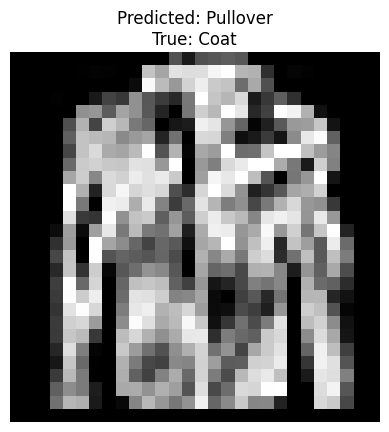

Predicted: Sandal, True: Ankle boot, Confidence: 51.35%


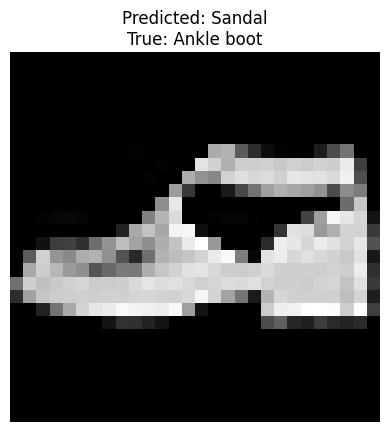

In [149]:
print("\nExamples of Incorrect Classifications:")
for i in range(num_examples):
    idx = incorrect_indices[i]
    predicted_class = class_names[y_pred_classes[idx]]
    true_class = class_names[y_true[idx]]
    confidence = np.max(y_pred[idx]) * 100
    print(f"Predicted: {predicted_class}, True: {true_class}, Confidence: {confidence:.2f}%")
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")
    plt.axis('off')
    plt.show()